In [41]:
import sys
sys.path.append("../")

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from pycox import datasets
from lifelines import KaplanMeierFitter

from tabulate import tabulate

In [43]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm"],
})

3.1473971432202483


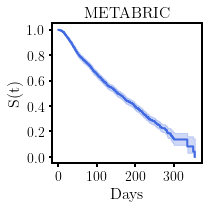

In [44]:
dataset = 'metabric'
if dataset == 'metabric':
    data = datasets.metabric.read_df()
if dataset == 'support':
    data = datasets.support.read_df()
if dataset == 'gbsg':
    data = datasets.gbsg.read_df()
data = data.astype({'event' : int})

titles = {'gbsg' : 'GBSG', 'metabric' : 'METABRIC', 'support' : 'SUPPORT'}
T = data['duration']
E = data['event']
print(T[E].median()/365*12)
kmf = KaplanMeierFitter()

ax = plt.subplot()

kmf.fit(T, E)
# kmf.plot_survival_function(ax=ax, legend=False, color='#7EA6E0',ci_force_lines=False, figsize=(9,6), linewidth=2)
kmf.plot_survival_function(ax=ax, legend=False, color='royalblue',ci_force_lines=False, figsize=(3,3), linewidth=2)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel('Days', fontsize=16)
plt.ylabel('S(t)', fontsize=16)
plt.title(titles[dataset],fontsize=16)
plt.xticks(fontsize=14)
# plt.xlim(0,2000)
# plt.ylim(0.0, 1.0)
plt.yticks(np.arange(0, 1.001, step=0.2), fontsize=14)
plt.tick_params(width=2)
# plt.setp(plt.axes, linewidth=2)


plt.tight_layout()
plt.savefig(f'../figs/KM-{dataset}.png', dpi=600, format='png')

AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


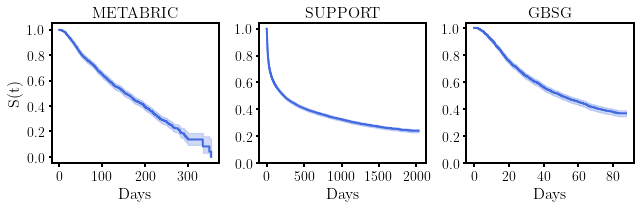

In [45]:
all_datasets = ['metabric','support','gbsg']
titles = {'gbsg' : 'GBSG', 'metabric' : 'METABRIC', 'support' : 'SUPPORT'}
for i, dataset in enumerate(all_datasets):

    kmf = KaplanMeierFitter()

    if dataset == 'metabric':
        data = datasets.metabric.read_df()
    if dataset == 'support':
        data = datasets.support.read_df()
    if dataset == 'gbsg':
        data = datasets.gbsg.read_df()
    data = data.astype({'event' : int})

    T = data['duration']
    E = data['event']

    ax = plt.subplot(1, 3, i + 1)
    print(ax)
        
    kmf.fit(T, E)
    kmf.plot_survival_function(ax=ax, legend=False, color='royalblue',ci_force_lines=False, figsize=(9,3), linewidth=2)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    plt.xlabel('Days', fontsize=16)
    if i == 0:
        plt.ylabel('S(t)', fontsize=16)
    plt.title(titles[dataset],fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(np.arange(0, 1.001, step=0.2), fontsize=14)
    plt.tick_params(width=2)


plt.tight_layout()
plt.savefig(f'../figs/KMpaper.svg', dpi=600, format='svg')

   
   
